In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


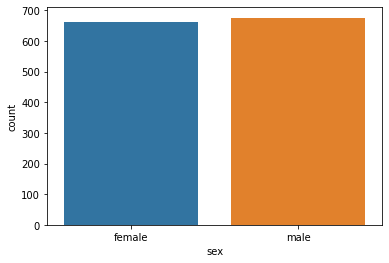

In [33]:
import seaborn as sns

sns.countplot(x = 'sex', data= data)


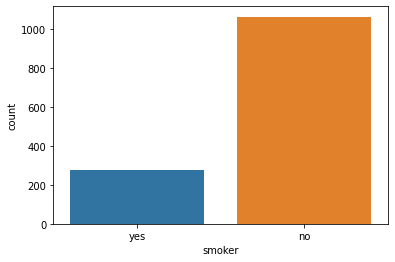

In [34]:
sns.countplot(x = 'smoker', data= data)

In [ ]:
#1)Age
#2)BMI
#3)Children
#4)Smoker

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72b91915f8>,
      dtype=object)

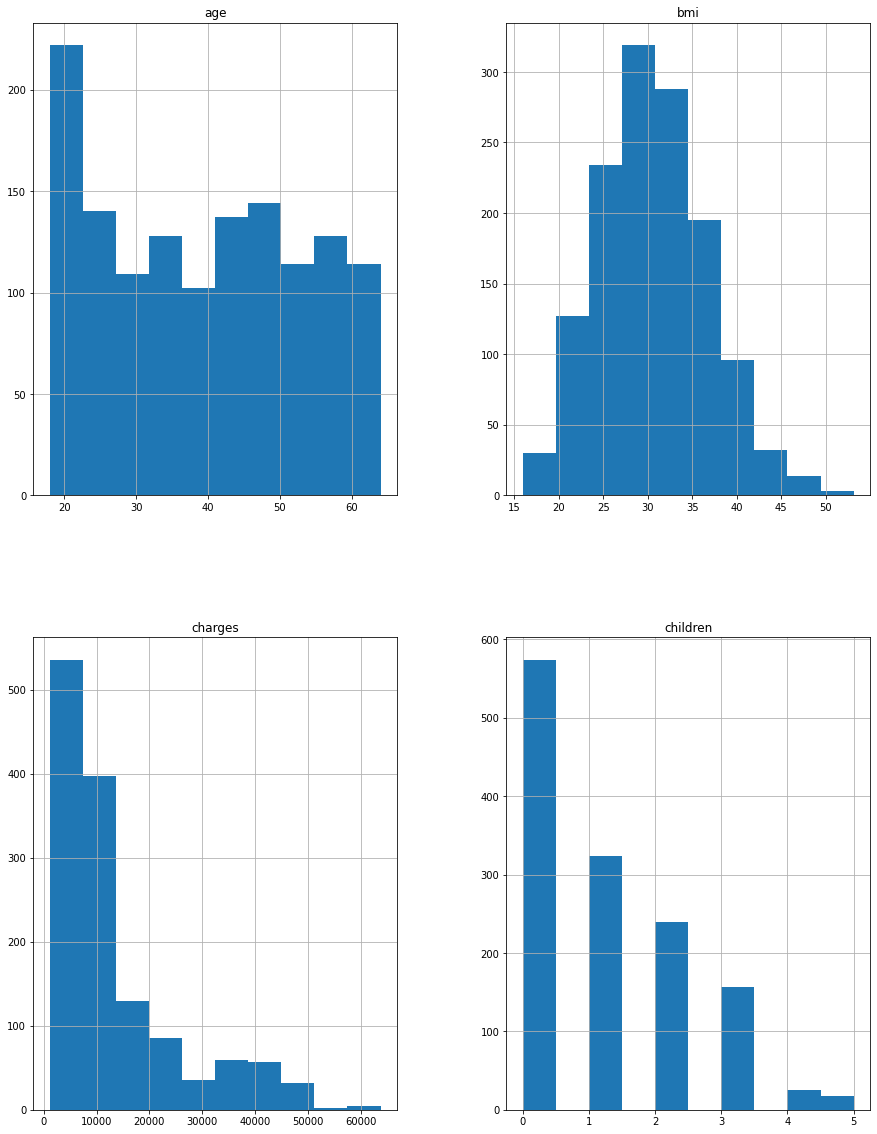

In [35]:
data.hist(figsize=(15,20))

In [36]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size= 0.2, random_state = 42)

In [37]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [38]:
corr = data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72bac88780>,
      dtype=object)

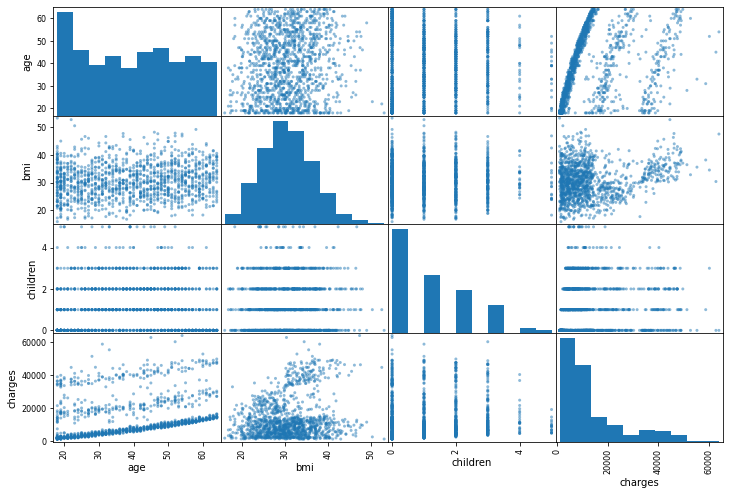

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12,8))

In [61]:
data2 = data.copy()

In [62]:
for i in range(len(data['sex'])):
  if data2['sex'][i] == 'male':
    data2['sex'][i] = 1.0
  else :
    data2['sex'][i] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
data2['sex'] = data2['sex'].astype(np.float32)

In [64]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float32
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float32(1), float64(3), int64(2), object(1)
memory usage: 68.1+ KB


In [65]:
data2_corr = data2.corr()
data2_corr

,age,sex,bmi,children,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.016569,0.067998
region,0.002127,0.004588,0.157566,0.016569,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,-0.006208,1.000000


In [66]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cat_encoder = ordinal_encoder.fit_transform(data[['region']])
cat_encoder[:10]

array([[3.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.]])

In [67]:
data2['region'] = cat_encoder

In [68]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float32
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float32(1), float64(3), int64(2), object(1)
memory usage: 68.1+ KB


In [93]:
data_y = data2['age']
data_age = data2.copy()

In [94]:
data_corr = data_age.corr()
data_corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72b67dfa58>,
      dtype=object)

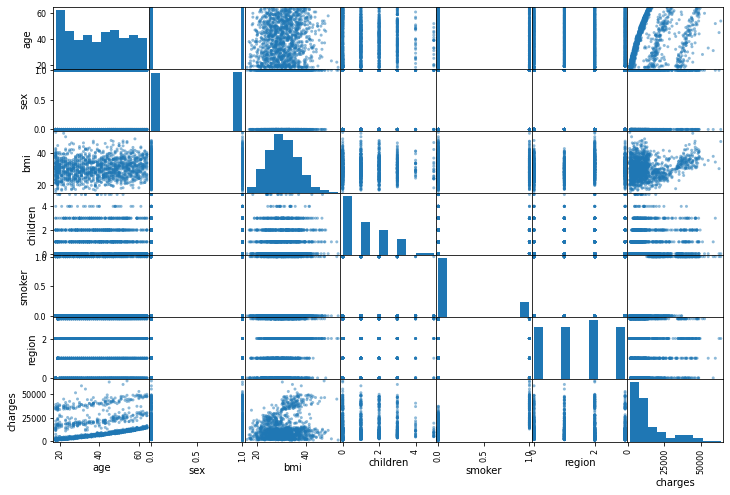

In [76]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_age, figsize=(12,8))

In [69]:
for i in range(len(data2['smoker'])):
  if data2['smoker'][i] == 'yes':
    data2['smoker'][i] = 1.0
  else:
    data2['smoker'][i] = 0.0  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [70]:
data2['smoker'] = data2['smoker'].astype(np.float32)

In [92]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float32
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float32
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float32(2), float64(3), int64(2)
memory usage: 62.8 KB


In [98]:

del data_age['age']

In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_age, data_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
some_data = data_age.iloc[:5]
some_labels = data_y.iloc[:5]

print("예측:", lin_reg.predict(some_data))
print("레이블:", list(some_labels))

예측: [24.01684664 32.24595686 34.86356158 54.30270053 35.05154641]
레이블: [19, 18, 28, 33, 32]


In [101]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_age, data_y)
forest_reg.score(data_age,data_y)

0.9750273658468588

In [102]:
some_data = data_age.iloc[:5]
some_labels = data_y.iloc[:5]

print("예측:", lin_reg.predict(some_data))
print("레이블:", list(some_labels))

예측: [24.01684664 32.24595686 34.86356158 54.30270053 35.05154641]
레이블: [19, 18, 28, 33, 32]


In [103]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_age, data_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [105]:
some_data = data_age.iloc[:5]
some_labels = data_y.iloc[:5]

print("예측:", tree_reg.predict(some_data))
print("레이블:", list(some_labels))

예측: [19. 18. 28. 33. 32.]
레이블: [19, 18, 28, 33, 32]


In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_age, data_y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [108]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [6.10847222 6.63606159 8.05762826 9.29652479 5.7256949  6.74094196
 6.56028303 6.48016491 9.75758814 7.90545638]
평균: 7.326881617973063
표준 편차: 1.2973067624881363


In [112]:
from sklearn.metrics import mean_squared_error

data_predictions = lin_reg.predict(data_age)
lin_mse = mean_squared_error(data_y, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
scores = cross_val_score(lin_reg, data_age, data_y,
                         scoring="neg_mean_squared_error", cv=10)

display_scores(lin_rmse)

점수: 11.988201177970074
평균: 11.988201177970074
표준 편차: 0.0


In [113]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_age, data_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [115]:
some_data = data_age.iloc[:5]
some_labels = data_y.iloc[:5]

print("예측:", forest_reg.predict(some_data))
print("레이블:", list(some_labels))

예측: [19.29 18.21 26.79 32.43 31.42]
레이블: [19, 18, 28, 33, 32]
